## CME538 GROUP PROJECT

TTC SUBWAY EXPLORATORY DATA ANALYSIS DATA VISUALIZATIONS PART 1

### Set up Notebook

In [43]:
import pandas as pd
# 3rd party imports
import os
import json
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
import math
import numpy as np

# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 

In [44]:
# Import data
ttc_subway_df = pd.read_csv("ttc_subway_df.csv")
ttc_bus_df = pd.read_csv("ttc_bus_df.csv")
octranspo_df = pd.read_csv("OC_Transpo_Bus_Info_With_Times.csv")
stm_df = pd.read_csv("stm_df.csv")


C:\Users\diana\AppData\Local\Temp\ipykernel_23112\3802667290.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ttc_bus_df = pd.read_csv("ttc_bus_df.csv")



### TTC SUBWAY

In [45]:
ttc_subway_df.head()

,Unnamed: 0,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
1,1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2,2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
3,3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
4,4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


In [46]:
# print dataframe info
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108004 non-null  int64 
 1   Date        108004 non-null  object
 2   Time        108004 non-null  object
 3   Day         108004 non-null  object
 4   Station     108004 non-null  object
 5   Code        108004 non-null  object
 6   Min Delay   108004 non-null  int64 
 7   Min Gap     108004 non-null  int64 
 8   Bound       79240 non-null   object
 9   Line        107675 non-null  object
 10  Vehicle     108004 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 9.1+ MB


In [47]:
#Convert the 'Date' colum to datetime format
ttc_subway_df['Date'] = pd.to_datetime(ttc_subway_df['Date'])
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  108004 non-null  int64         
 1   Date        108004 non-null  datetime64[ns]
 2   Time        108004 non-null  object        
 3   Day         108004 non-null  object        
 4   Station     108004 non-null  object        
 5   Code        108004 non-null  object        
 6   Min Delay   108004 non-null  int64         
 7   Min Gap     108004 non-null  int64         
 8   Bound       79240 non-null   object        
 9   Line        107675 non-null  object        
 10  Vehicle     108004 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 9.1+ MB


In [48]:
# Set the data colum as the index
#Subway DF
ttc_subway_df.set_index('Date', inplace = True)
ttc_subway_df.head()



,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Date,,,,,,,,,,
2022-01-01,0,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
2022-01-01,1,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2022-01-01,2,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
2022-01-01,3,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
2022-01-01,4,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


### Time-based indexing

In [49]:
# Add new columns 'year', 'month' and 'month_day'that indicate the year, month and day associated with each observation

ttc_subway_df['year'] = ttc_subway_df.index.year
ttc_subway_df['month'] = ttc_subway_df.index.month
ttc_subway_df['month_day'] = ttc_subway_df.index.day
ttc_subway_df.tail()

,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day
Date,,,,,,,,,,,,,
2021-12-31,107999,01:10,Friday,MUSEUM STATION,SUUT,0,0,N,YU,5591,2021,12,31
2021-12-31,108000,01:12,Friday,FINCH STATION,SUDP,5,10,S,YU,5983,2021,12,31
2021-12-31,108001,01:21,Friday,EGLINTON WEST STATION,PUOPO,3,8,N,YU,6046,2021,12,31
2021-12-31,108002,01:37,Friday,SHEPPARD WEST STATION,SUDP,0,0,S,YU,5536,2021,12,31
2021-12-31,108003,07:00,Friday,DON MILLS STATION,TUSC,0,0,E,SHP,6146,2021,12,31


In [50]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108004 entries, 2022-01-01 to 2021-12-31
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108004 non-null  int64 
 1   Time        108004 non-null  object
 2   Day         108004 non-null  object
 3   Station     108004 non-null  object
 4   Code        108004 non-null  object
 5   Min Delay   108004 non-null  int64 
 6   Min Gap     108004 non-null  int64 
 7   Bound       79240 non-null   object
 8   Line        107675 non-null  object
 9   Vehicle     108004 non-null  int64 
 10  year        108004 non-null  int32 
 11  month       108004 non-null  int32 
 12  month_day   108004 non-null  int32 
dtypes: int32(3), int64(4), object(6)
memory usage: 10.3+ MB


### TTC BUS 

In [51]:
ttc_bus_df

,Unnamed: 0,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0
1,1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0
2,2,2018-01-01,28,00:30:00,Monday,Davisville Station,Investigation,30.0,60.0,S/B,8306.0
3,3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0
4,4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0
...,...,...,...,...,...,...,...,...,...,...,...
313455,313455,2023-09-30,41,23:45,Saturday,KEELE STATION,Mechanical,22.0,44.0,NaN,1420.0
313456,313456,2023-09-30,121,23:55,Saturday,103 LOWER JARVIS ST,Operations - Operator,20.0,40.0,E,8577.0
313457,313457,2023-09-30,52,00:29,Saturday,THE WESTWAY AND KIPLIN,Emergency Services,23.0,46.0,W,3576.0
313458,313458,2023-09-30,70,00:54,Saturday,COXWELL STATION,Operations - Operator,15.0,30.0,E,8440.0


In [52]:
#Convert the 'Date' colum to datetime format
ttc_bus_df['Date'] = pd.to_datetime(ttc_bus_df['Report Date'])
ttc_bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313460 entries, 0 to 313459
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   313460 non-null  int64         
 1   Report Date  313460 non-null  object        
 2   Route        312339 non-null  object        
 3   Time         313460 non-null  object        
 4   Day          313460 non-null  object        
 5   Location     313154 non-null  object        
 6   Incident     312525 non-null  object        
 7   Min Delay    307525 non-null  float64       
 8   Min Gap      312570 non-null  float64       
 9   Direction    281162 non-null  object        
 10  Vehicle      286529 non-null  float64       
 11  Date         313460 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 28.7+ MB


In [53]:
# Set the date colum as the index

ttc_bus_df.set_index('Date', inplace = True)
ttc_bus_df.head()

,Unnamed: 0,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
Date,,,,,,,,,,,
2018-01-01,0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0
2018-01-01,1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0
2018-01-01,2,2018-01-01,28,00:30:00,Monday,Davisville Station,Investigation,30.0,60.0,S/B,8306.0
2018-01-01,3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0
2018-01-01,4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0


### Outliers

In [54]:
ttc_subway_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle,year,month,month_day
count,108004.000000,108004.000000,108004.000000,108004.000000,108004.000000,108004.000000,108004.000000
mean,54001.500000,2.971066,4.399124,3619.806989,2020.430151,6.289684,15.862959
std,31178.213574,9.874597,10.585862,2622.799270,1.750949,3.407509,8.824946
min,0.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000
25%,27000.750000,0.000000,0.000000,0.000000,2019.000000,3.000000,8.000000
50%,54001.500000,0.000000,0.000000,5186.000000,2020.000000,6.000000,16.000000
75%,81002.250000,4.000000,8.000000,5656.000000,2022.000000,9.000000,23.000000
max,108003.000000,515.000000,519.000000,69021.000000,2023.000000,12.000000,31.000000


C:\Users\diana\AppData\Local\Temp\ipykernel_23112\1108744901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')


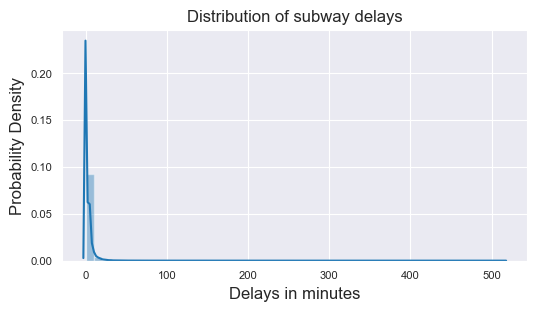

In [55]:
# Create probability density plot 
plt.figure(figsize=(6,3))
ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')

# Set labels and legend
plt.xlabel('Delays in minutes', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution of subway delays')

#Change tick sizes
ttc_delays.xaxis.set_tick_params(labelsize=8)
ttc_delays.yaxis.set_tick_params(labelsize=8)

# Show the plot
plt.show()

In [56]:
#Remove Min Delay outliers
# Calculate the quartiles and IQR
Q1= ttc_subway_df['Min Delay'].quantile(0.25)
Q3= ttc_subway_df['Min Delay'].quantile(0.75)
IQR =Q3-Q1

#Define the bounds for outlier removal
lower_bound= Q1-1.5*IQR
upper_bound= Q3 +1.5*IQR

#Remove outliers by creating a mask
mask= (ttc_subway_df['Min Delay']<= upper_bound)
ttc_subway_df = ttc_subway_df[mask]

# View DataFrame
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102486 entries, 2022-01-01 to 2021-12-31
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  102486 non-null  int64 
 1   Time        102486 non-null  object
 2   Day         102486 non-null  object
 3   Station     102486 non-null  object
 4   Code        102486 non-null  object
 5   Min Delay   102486 non-null  int64 
 6   Min Gap     102486 non-null  int64 
 7   Bound       73761 non-null   object
 8   Line        102157 non-null  object
 9   Vehicle     102486 non-null  int64 
 10  year        102486 non-null  int32 
 11  month       102486 non-null  int32 
 12  month_day   102486 non-null  int32 
dtypes: int32(3), int64(4), object(6)
memory usage: 9.8+ MB


### Day of the week

In [57]:
ttc_bus_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle
count,313460.000000,307525.000000,312570.000000,286529.000000
mean,156729.500000,22.329710,33.748024,5528.746696
std,90488.252028,73.698228,74.520075,3763.471128
min,0.000000,-54.000000,0.000000,0.000000
25%,78364.750000,8.000000,16.000000,1648.000000
50%,156729.500000,10.000000,20.000000,7950.000000
75%,235094.250000,18.000000,34.000000,8583.000000
max,313459.000000,2030.000000,1890.000000,99035.000000


In [58]:
ttc_bus_daily = ttc_bus_df.groupby("Report Date").mean("Min Delay").reset_index()
ttc_bus_daily["Report Date"] = pd.to_datetime(ttc_bus_daily["Report Date"])

ttc_bus_daily["weekday"] = ttc_bus_daily["Report Date"].dt.weekday

ttc_bus_daily.head()


,Report Date,Unnamed: 0,Min Delay,Min Gap,Vehicle,weekday
0,2018-01-01,84.5,18.670588,32.241176,5563.447205,0
1,2018-01-02,316.5,16.646259,26.044218,5897.653137,1
2,2018-01-03,581.5,16.459574,26.463830,6172.705357,2
3,2018-01-04,835.5,18.617647,28.599265,6277.352941,3
4,2018-01-05,1111.5,10.978571,21.071429,5692.337079,4


In [59]:
ttc_bus_daily.groupby("weekday").mean("Min Delay").reset_index()


,weekday,Unnamed: 0,Min Delay,Min Gap,Vehicle
0,0,166288.230000,22.107403,33.600986,5563.643189
1,1,166445.601667,21.023552,32.369878,5564.669328
2,2,166638.734114,21.092614,32.339697,5551.023210
3,3,166810.379599,20.231165,31.294528,5548.385030
4,4,166981.836120,21.682341,32.851267,5507.932264
5,5,167127.627090,25.465418,37.876898,5378.823451
6,6,166720.158863,24.738104,37.644840,5430.473261


In [60]:

ttc_bus_daily['weekday'] = ttc_bus_daily['weekday'].replace({
        "0": 'Monday', "1": 'Tuesday', "2": 'Wednesday', "3": 'Thursday', "4": 'Friday', "5": 'Saturday', "6":'Sunday'})

ttc_bus_daily.head()

,Report Date,Unnamed: 0,Min Delay,Min Gap,Vehicle,weekday
0,2018-01-01,84.5,18.670588,32.241176,5563.447205,0
1,2018-01-02,316.5,16.646259,26.044218,5897.653137,1
2,2018-01-03,581.5,16.459574,26.463830,6172.705357,2
3,2018-01-04,835.5,18.617647,28.599265,6277.352941,3
4,2018-01-05,1111.5,10.978571,21.071429,5692.337079,4


<Figure size 1500x600 with 0 Axes>

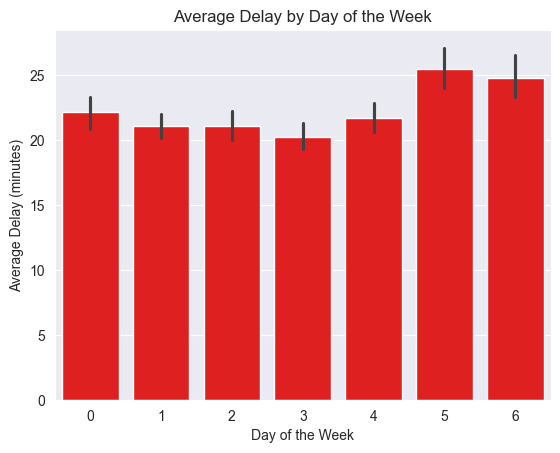

<Figure size 1500x600 with 0 Axes>

In [61]:
ax = sns.barplot(data=ttc_bus_daily, x = "weekday", y = "Min Delay", color="red", )
plt.title("Average Delay by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Delay (minutes)")
plt.figure(figsize=(15,6))


In [62]:
ttc_bus_df.head()

,Unnamed: 0,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
Date,,,,,,,,,,,
2018-01-01,0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0
2018-01-01,1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0
2018-01-01,2,2018-01-01,28,00:30:00,Monday,Davisville Station,Investigation,30.0,60.0,S/B,8306.0
2018-01-01,3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0
2018-01-01,4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0


### Reliability calcs

In [63]:
TTC_ridesperday_dict = {
    "0": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "1": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "2": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "3": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "4": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "5": math.ceil(20*60/4.5)*4,
    "6": math.ceil(18*60/8)*4
}



In [64]:
ttc_subway_df_temp = ttc_subway_df.reset_index()

ttc_subway_df_temp.head()

,Date,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day
0,2022-01-01,0,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022,1,1
1,2022-01-01,1,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0,2022,1,1
2,2022-01-01,2,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0,2022,1,1
3,2022-01-01,3,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022,1,1
4,2022-01-01,4,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022,1,1


In [65]:
ttc_subway_df_temp["day"] = ttc_subway_df_temp["Date"].dt.date
ttc_subway_df_temp["weekday"] = ttc_subway_df_temp["Date"].dt.weekday

ttc_subway_df_daily = ttc_subway_df_temp.groupby(["day", "weekday"]).count().reset_index()

In [66]:
ttc_subway_df_daily


,day,weekday,Date,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day
0,2018-01-01,0,56,56,56,56,56,56,56,56,40,56,56,56,56,56
1,2018-01-02,1,72,72,72,72,72,72,72,72,56,71,72,72,72,72
2,2018-01-03,2,64,64,64,64,64,64,64,64,56,64,64,64,64,64
3,2018-01-04,3,60,60,60,60,60,60,60,60,42,60,60,60,60,60
4,2018-01-05,4,76,76,76,76,76,76,76,76,64,76,76,76,76,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,2023-09-26,1,63,63,63,63,63,63,63,63,37,63,63,63,63,63
2095,2023-09-27,2,73,73,73,73,73,73,73,73,55,73,73,73,73,73
2096,2023-09-28,3,57,57,57,57,57,57,57,57,35,57,57,57,57,57
2097,2023-09-29,4,52,52,52,52,52,52,52,52,34,52,52,52,52,52


In [67]:
def define_daily_rides_TTC(row_temp):
    day = str(row_temp["weekday"])
    return TTC_ridesperday_dict.get(day)
    

In [68]:
ttc_subway_df_daily["total_daily_rides"] = ttc_subway_df_daily.apply(define_daily_rides_TTC, axis=1)

In [69]:
ttc_subway_df_daily

,day,weekday,Date,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,total_daily_rides
0,2018-01-01,0,56,56,56,56,56,56,56,56,40,56,56,56,56,56,1068
1,2018-01-02,1,72,72,72,72,72,72,72,72,56,71,72,72,72,72,1068
2,2018-01-03,2,64,64,64,64,64,64,64,64,56,64,64,64,64,64,1068
3,2018-01-04,3,60,60,60,60,60,60,60,60,42,60,60,60,60,60,1068
4,2018-01-05,4,76,76,76,76,76,76,76,76,64,76,76,76,76,76,1068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,2023-09-26,1,63,63,63,63,63,63,63,63,37,63,63,63,63,63,1068
2095,2023-09-27,2,73,73,73,73,73,73,73,73,55,73,73,73,73,73,1068
2096,2023-09-28,3,57,57,57,57,57,57,57,57,35,57,57,57,57,57,1068
2097,2023-09-29,4,52,52,52,52,52,52,52,52,34,52,52,52,52,52,1068


In [70]:
ttc_subway_df_daily["reliability"] = 1 - ttc_subway_df_daily["Date"] / ttc_subway_df_daily["total_daily_rides"]

ttc_subway_df_daily

,day,weekday,Date,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day,total_daily_rides,reliability
0,2018-01-01,0,56,56,56,56,56,56,56,56,40,56,56,56,56,56,1068,0.947566
1,2018-01-02,1,72,72,72,72,72,72,72,72,56,71,72,72,72,72,1068,0.932584
2,2018-01-03,2,64,64,64,64,64,64,64,64,56,64,64,64,64,64,1068,0.940075
3,2018-01-04,3,60,60,60,60,60,60,60,60,42,60,60,60,60,60,1068,0.943820
4,2018-01-05,4,76,76,76,76,76,76,76,76,64,76,76,76,76,76,1068,0.928839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094,2023-09-26,1,63,63,63,63,63,63,63,63,37,63,63,63,63,63,1068,0.941011
2095,2023-09-27,2,73,73,73,73,73,73,73,73,55,73,73,73,73,73,1068,0.931648
2096,2023-09-28,3,57,57,57,57,57,57,57,57,35,57,57,57,57,57,1068,0.946629
2097,2023-09-29,4,52,52,52,52,52,52,52,52,34,52,52,52,52,52,1068,0.951311


AttributeError: 'PathCollection' object has no attribute 'set_xlabel'

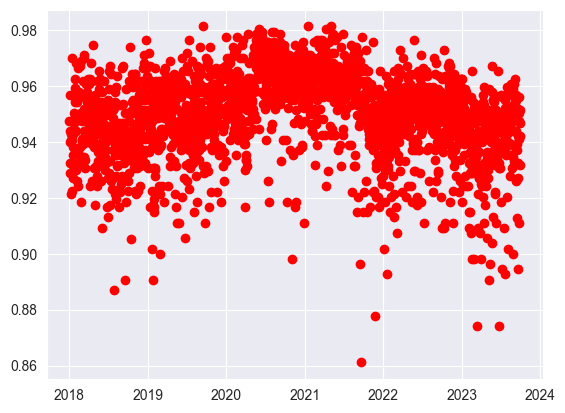

In [71]:
ax = plt.scatter(data=ttc_subway_df_daily, x= "day", y="reliability", color="red")
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Yellow Line (%)', fontsize=18)
plt.show()

In [ ]:
ttc_avg_reliability = ttc_subway_df_daily["reliability"].mean()

print(ttc_avg_reliability)

In [ ]:
ttc_subway_df_daily

In [ ]:
toronto_weather = pd.read_csv("toronto_weather_simplified.csv")

toronto_weather

In [ ]:
ttc_subway_df_daily["day"] = ttc_subway_df_daily.day.astype("str")
toronto_weather["Date/Time"] = toronto_weather["Date/Time"].astype("str")

ttc_subway_daily_weather_reliability = pd.merge(left= ttc_subway_df_daily, right=toronto_weather, left_on="day", right_on="Date/Time", how="left", )
 
ttc_subway_daily_weather_reliability = ttc_subway_daily_weather_reliability[["day", "Date/Time", "Mean Temp (°C)", "reliability"]]
 
ttc_subway_daily_weather_reliability

In [ ]:
ax = sns.scatterplot(data=ttc_subway_daily_weather_reliability, x="day", y="reliability", hue="Mean Temp (°C)", palette="mako")
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Average Reliability (%)', fontsize=18)
ax.set_title("TTC Subway - Average Reliability and Temperature", size=18)
desired_ticks = 10
xticks_positions = np.linspace(0, 2000, desired_ticks)
plt.xticks(xticks_positions, rotation=45)
plt.show()

### Reliability Plot

In [ ]:
#Toronto subway reliability
sns.set()
plt.figure(figsize=(14, 6))

# Use lineplot instead of scatter
ax = sns.lineplot(data=ttc_subway_df_daily, x="day", y="reliability", color="red")

ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Average Reliability (%)', fontsize=18)
ax.set_title('Toronto Subway Average Reliability over Days')

plt.show()

In [ ]:
grouped_orange = ["reliability"].mean()
ax = grouped_orange.plot(color="orange")
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Orange Line (%)', fontsize=18)
plt.show()

### Montreal (STM) Subway Data


In [ ]:
stm_df.head()

In [ ]:
stm_df_backup = stm_df

In [ ]:
stm_df.head()

In [ ]:
stm_df.describe()

In [ ]:
stm_df_causes = stm_df_backup.groupby("Cause primaire").mean("delay").sort_values(by = "delay", ascending=False).reset_index()

stm_df_causes

In [ ]:
sns.barplot(data=stm_df_causes, x="Cause primaire", y = "delay", palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Delay by Reported Cause")
plt.xlabel("Cause of Delay")
plt.ylabel("Average Delay (minutes)")

In [ ]:
stm_df["cause"] = stm_df["Cause primaire"] + " " + stm_df["Cause secondaire"]

In [ ]:
stm_df = stm_df.drop(columns=["Jour calendaire", "Année civile/mois", "Évacuation", "Porte", "KFS", "Véhicule", "Dommage matériel", "Urgence métro", "CAT", "Cause secondaire", "Cause primaire"])

In [ ]:
translate_key = {
    "1": "verte", 
    "2": "orange",
    "4": "jaune",
    "5": "bleue"
}

stm_df["Ligne"] = stm_df["Ligne"].replace(to_replace=translate_key.keys(), value=translate_key.values())

In [ ]:
stm_df["time_dt"] = pd.to_datetime(stm_df["time_dt"])

In [ ]:
stm_df.groupby('Jour de la semaine')["Jour de la semaine"].count()

In [ ]:
orange_ridesperday_dict = {
    "1": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "2": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "3": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "4": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "5": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "6": math.ceil(19.5*60/8),
    "7": math.ceil(19*60/8)
}

In [ ]:
verte_ridesperday_dict = {
    "1": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "2": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "3": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "4": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "5": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "6": math.ceil(19.5*60/9),
    "7": math.ceil(19*60/9)
}

In [ ]:
jaune_ridesperday_dict = {
    "1": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "2": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "3": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "4": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "5": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "6": math.ceil(19.5*60/8),
    "7": math.ceil(19*60/8)
}

In [ ]:
bleue_ridesperday_dict = {
    "1": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "2": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "3": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "4": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "5": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "6": math.ceil(19.5*60/9.5),
    "7": math.ceil(19*60/9.5)
}

In [ ]:
avg_daily_rides = {
    "1": 205,
    "2": 205,
    "3": 205,
    "4": 205,
    "5": 205,
    "6": 135,
    "7": 130
}

In [ ]:
print("Orange: ", orange_ridesperday_dict)
print("Verte: ", verte_ridesperday_dict)
print("Jaune: ", jaune_ridesperday_dict)
print("Bleue: ", bleue_ridesperday_dict)
print("Avg: ", avg_daily_rides)

In [ ]:
row_collector = []

for row in stm_df["Ligne"]:
    print(row)
    if row.find("1") >= 0:
        temp = "Multi-Line"
    elif row.find("2") >= 0:
        temp = "Multi-Line"
    elif row.find("4") >= 0:
        temp = "Multi-Line"
    elif row.find("5") >= 0:
        temp = "Multi-Line"
    else:
        temp = row
    row_collector.append(temp)

stm_df["Ligne"] = row_collector

stm_df.head()
    

In [ ]:
stm_df = stm_df[stm_df["Ligne"] != "Non affecté"]

In [ ]:
stm_df.head()

In [ ]:
stm_df["date"] = stm_df["time_dt"].dt.date

stm_delay_perday = stm_df.groupby(["date", "Jour de la semaine", "Ligne"]).count().reset_index()

In [ ]:
stm_delay_perday.head()

In [ ]:
stm_delay_perday.head()

stm_delay_perday["weekday"] = stm_delay_perday["Jour de la semaine"] + 1
 
stm_delay_perday.head()

In [ ]:
def define_daily_rides(row_temp):
    line_temp = str(row_temp["Ligne"])
    day = str(row_temp["weekday"])
    print(line_temp)
    
    if line_temp == "Ligne bleue":
        return bleue_ridesperday_dict.get(day)
    elif line_temp == "Ligne orange":
        return orange_ridesperday_dict.get(day)
    elif line_temp == "Ligne verte":
        return verte_ridesperday_dict.get(day)
    elif line_temp == "Ligne jaune":
        return jaune_ridesperday_dict.get(day)
    else: 
        print("returned other")
        return avg_daily_rides.get(day)

In [ ]:
stm_delay_perday["total_daily_rides"] = stm_delay_perday.apply(define_daily_rides, axis=1)

In [ ]:
stm_delay_perday

In [ ]:
stm_delay_perday["reliability"] = 1 - stm_delay_perday["delay"] / stm_delay_perday["total_daily_rides"]

stm_delay_perday

### Montreal Weather 

In [ ]:
montreal_weather_df = pd.read_csv("montreal_weather_simplified.csv")

In [ ]:
montreal_weather_means = montreal_weather_df[["Mean Temp (°C)", "Date/Time"]]
montreal_weather_means

In [ ]:
stm_df_temp = stm_df
stm_df_temp["date"] = stm_df_temp["date"].astype(str)

stm_df_weather = pd.merge(left=stm_df, right=montreal_weather_means, left_on="date", right_on="Date/Time", how="left")

In [ ]:
stm_df_weather

In [ ]:
stm_df_weather["date"] = pd.to_datetime(stm_df_weather["date"])
stm_df_weather.plot(x="date", y="Mean Temp (°C)")

In [ ]:
stm_df_weather.head()

In [ ]:
stm_df_weather_monthly = stm_df_weather.groupby(["Année civile", "Mois calendrier"]).agg({"Mean Temp (°C)": 'mean', "delay": 'sum'}).reset_index()

ax = stm_df_weather_monthly.plot()


In [ ]:
stm_df_weather_daily = stm_df_weather.groupby(["date", "Ligne"])[["delay", "Mean Temp (°C)"]].mean().reset_index()

stm_df_weather_daily

In [ ]:
stm_delay_perday["date"] = stm_delay_perday["date"].astype(str)
stm_df_weather_daily["date"] = stm_df_weather_daily["date"].astype(str)

stm_df_weather_reliability = pd.merge(left=stm_df_weather_daily, right= stm_delay_perday, left_on=["date", "Ligne"], right_on=["date", "Ligne"], how="left")

stm_df_weather_reliability.drop(columns=["Jour de la semaine", "Jour du mois", "Numero d\'incident", "Type d\'incident", "Symptome", "Numéro de tournée", "Heure de l\'incident", "Heure de reprise", "Incident en minutes", "Porte de voiture", "Type de matériel", "Code de lieu", "time_dt", "delay_y", "cause", "weekday"], inplace=True)

stm_df_weather_reliability = stm_df_weather_reliability.groupby("date").mean(["Mean Temp (°C)", "reliability"])

stm_df_weather_reliability

In [ ]:
ax = sns.scatterplot(data=stm_df_weather_reliability, x="date", y="reliability", hue="Mean Temp (°C)", palette="mako")
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Average Reliability (%)', fontsize=18)
ax.set_title("STM - Average Reliability and Temperature", size=18)
desired_ticks = 10
xticks_positions = np.linspace(0, 1500, desired_ticks)
plt.xticks(xticks_positions, rotation=45)
plt.show()

In [ ]:
stm_df_weather_monthly["year-month"] = stm_df_weather_monthly["Année civile"].astype(str) + "-" + stm_df_weather_monthly["Mois calendrier"].astype(str)


#First line and first axis
ax1= sns.lineplot(x="year-month", y='delay', data=stm_df_weather_monthly, label= 'Delay')
ax1.set_ylabel('Avg Min Delay per day')
ax1.set_xlabel('Date')
# ax1.set_ylim([0, 23000])
ax1.legend(loc='upper left')
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
desired_ticks = 10
xticks_positions = np.linspace(0, 100, desired_ticks)
plt.xticks(xticks_positions)

# Second line on the second y-axis
ax2 = ax1.twinx()
ax2.set_ylim([0, 60])
ax2.set_ylabel('Mean Temp (°C)')
ax2.set_xlabel('Date')
ax2.legend(loc='upper right')
sns.lineplot(x="year-month", y='Mean Temp (°C)', data=stm_df_weather_monthly, ax=ax2, color='orange', label='Mean Temperature')

# Limit the range (excluding last date which has no data)
# plt.xlim([pd.to_datetime('2019-05-08'), pd.to_datetime('2019-06-22')])
plt.title('Mean Delay and Mean Monthly Temperature')

plt.show()

## STM GRAPHS AND STATS


In [ ]:
grouped_jaune = stm_delay_perday[stm_delay_perday["Ligne"] == "Ligne jaune"].groupby("date")["reliability"].mean()
ax = grouped_jaune.plot(color="yellow")
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Yellow Line (%)', fontsize=18)
plt.show()

In [ ]:
grouped_bleue = stm_delay_perday[stm_delay_perday["Ligne"] == "Ligne bleue"].groupby("date")["reliability"].mean()
ax = grouped_bleue.plot()
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Blue Line (%)', fontsize=18)
plt.show()

In [ ]:
grouped_verte = stm_delay_perday[stm_delay_perday["Ligne"] == "Ligne verte"].groupby("date")["reliability"].mean()
ax = grouped_verte.plot(color="green")
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Green Line (%)', fontsize=18)
plt.show()

In [ ]:
grouped_orange = stm_delay_perday[stm_delay_perday["Ligne"] == "Ligne orange"].groupby("date")["reliability"].mean()
ax = grouped_orange.plot(color="orange")
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Orange Line (%)', fontsize=18)
plt.show()

In [ ]:
plt.scatter(stm_df['time_dt'], stm_df['delay'])
plt.show()

In [ ]:
# PLot boxplot of delay per year
plt.figure(figsize=(10, 5))
plt.title('Subway Delay segmented per year', fontsize=18)
ax = sns.boxplot(x = stm_df['Mois calendrier'] , y = stm_df['delay'])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('month', fontsize=18)
ax.set_ylabel('Delay', fontsize=18)
plt.show()

In [ ]:
ax = stm_df.groupby(["Année civile", "Mois calendrier"])["delay"].sum().plot()
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Total Delay (minutes)', fontsize=18)
plt.title('Total STM Subway Delay Over Time', fontsize=18)
plt.show()

In [ ]:
ax = stm_df.groupby(["Année civile", "Mois calendrier"])["delay"].mean().plot()
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Average Delay (minutes)', fontsize=18)
plt.title('Average STM Subway Delay Over Time', fontsize=18)
plt.show()

In [ ]:
ax = stm_df.groupby(["Année civile", "Mois calendrier"])["delay"].mean().plot()
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Average Delay (minutes)', fontsize=18)
plt.show()

In [ ]:
grouped = stm_df.groupby(['Ligne', stm_df['time_dt'].dt.date])['delay'].sum().reset_index()

# Plot summed delay for each day for each line
for line, group in grouped.groupby('Ligne'):
    plt.scatter(group['time_dt'], group['delay'], label=line)


# Set labels and title
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Total Daily Delay (minutes)', fontsize=18)
plt.show()

In [ ]:
grouped = stm_df.groupby(['Ligne', stm_df['time_dt'].dt.date])['delay'].mean().reset_index()

# Plot summed delay for each day for each line
for line, group in grouped.groupby('Ligne'):
    plt.scatter(group['time_dt'], group['delay'], label=line)

# Set labels and title
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Average Delay (minutes)', fontsize=18)
plt.show()

In [ ]:
delay_by_month = stm_df.groupby(["Mois calendrier", "Année civile"])["delay"].sum()

delay_by_month

In [ ]:
avg_delay_by_month = stm_df.groupby(["Mois calendrier", "Année civile"])["delay"].mean()

avg_delay_by_month

In [ ]:
stm_average_delay = avg_delay_by_month.mean()
print(stm_average_delay)

In [ ]:
stm_delay_perday


In [ ]:
stm_average_reliability = stm_delay_perday["reliability"].mean()

print(stm_average_reliability)